In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer, KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
# creates a custom data parser before load data (uses SAS timestamp)
custom_date_parser = lambda x: pd.to_datetime(pd.to_numeric(x), origin='1960-01-01', unit='D')

# load the data into a dataframe
df = pd.read_csv('./data/SBAcase.11.13.17.csv', 
                 parse_dates=['ApprovalDate', 'DisbursementDate', 'ChgOffDate'], 
                 date_parser=custom_date_parser)

# drop variables from EDA analysis
df = df.drop(['Selected', 'daysterm', 'xx', 'ApprovalFY', 'NAICS', 'MIS_Status', 'ChgOffPrinGr', 'ChgOffDate',
             'State', 'BalanceGross', 'Name', 'Zip', 'City', 'Bank', 'LoanNr_ChkDgt'], axis=1)

In [26]:
# adjusting 'NewExist' var and drop 'New' (duplicated info)
NewExist = {1: "Existing Business", 2: "New Business", 0: np.nan}

df.replace({"NewExist": NewExist}, inplace=True)
df.drop(['New'], axis=1, inplace=True)

In [27]:
# create a column 'Franchise' and drop FranchiseCode
df['Franchise'] = df['FranchiseCode'].apply(lambda x: 'No franchise' if x in [0, 1] else 'Franchise')
df.drop(['FranchiseCode'], axis=1, inplace=True)

In [28]:
# adjusting 'UrbanRural' var
UrbanRural = {1: "Urban", 2: "Rural", 0: np.nan}

df.replace({"UrbanRural": UrbanRural}, inplace=True)

In [29]:
# categorical columns
cat_cols = df.select_dtypes('object').columns

In [55]:
# as macroeconomy changes overtime, it's usually a cycle, using dates to predict default can be dangerous
# so I'll drop dates from the dateset (although I'll keep Recession flag)
df.drop(['ApprovalDate', 'DisbursementDate'], axis=1, inplace=True)

## 02. Train-Test-Split

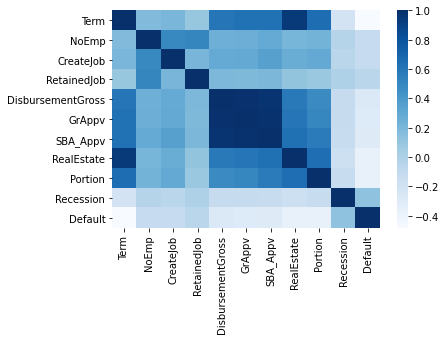

In [58]:
sns.heatmap(df.corr(), cmap='Blues');

In [57]:
df.dtypes

BankState             object
Term                   int64
NoEmp                  int64
NewExist              object
CreateJob              int64
RetainedJob            int64
UrbanRural            object
RevLineCr             object
LowDoc                object
DisbursementGross      int64
GrAppv                 int64
SBA_Appv               int64
RealEstate             int64
Portion              float64
Recession              int64
Default                int64
Franchise             object
dtype: object